# Example: Plane Change Maneuver

Find the $\Delta v$ requirement for an orbital transfer from a 300 km circular LEO at 28.6° inclination to geostationary equatorial orbit. The orbital transfer should consist of two impulses. Compare the $\Delta v$ requirement for 3 cases:

1. The spacecraft changes its orbital inclination to 0° and changes to a Hohmann transfer trajectory in one impulse, then circularizes its orbit at GEO (plane change at LEO)
2. The spacecraft changes to a Hohmann transfer trajectory without changing plane with the first impulse, then circularizes its orbit and changes plane upon reaching GEO altitue (plane change at GEO)
3. The spacecraft starts in a 300 km equatorial orbit, instead of an inclined orbit, so no plane change is required

## Solution

From our analysis Eq. {eq}`eq:plane-change-delta-v-scalar` for $\Delta v$, we expect that plane changes at altitude will be more efficient than in LEO because the speed decreases for higher altitude orbits. Likewise, we expect that the maneuvers that require a plane change will require more $\Delta v$ than the one that doesn't.

To start, we need to define the various radii, specific orbital energies, and speeds of the initial and final orbits.

In [1]:
import numpy as np

R_E = 6378.1  # km
mu = 3.986E5  # km**3/s**2
delta_i = np.radians(28.6)

r_1 = 300 + R_E  # km
v_1 = np.sqrt(mu / r_1)  # km/s
E_1 = v_1**2 / 2 - mu / r_1  # km**2/s**2

r_2 = 42_164  # km
v_2 = np.sqrt(mu / r_2)  # km/s
E_2 = v_2**2 / 2 - mu / r_2  # km**2/s**2

Then, we can calculate the properties of the Hohmann transfer orbit. Interestingly, the specific orbital energy of the transfer orbit is independent of the inclination, since it depends only on the semimajor axis, from Eq. {eq}`eq:ellipse-specific-energy`. Thus, the velocity at apogee and perigee of the transfer orbit also don't depend on inclination.

In [2]:
r_p = r_1
r_a = r_2
a_t = (r_p + r_a) / 2
E_t = - mu / (2 * a_t)
v_t1 = np.sqrt(2 * (E_t + mu / r_p))
v_t2 = np.sqrt(2 * (E_t + mu / r_a))

### Case 1: Plane Change at LEO

The total $\Delta v$ for this maneuver must include both impulses. The $\Delta v$ in LEO, which includes the plane change, is given by Eq. {eq}`eq:plane-change-delta-v-apsis`. The velocity in the circular initial orbit does not have a radial component, and the Hohmann transfer orbit leaves the initial orbit at perigee so it doesn't have a radial velocity component either.

From Eq. {eq}`eq:plane-change-delta-v-apsis`, $v_1$ is the velocity in the 300 km circular orbit, and $v_2 = v_{t,1}$ is the velocity at perigee of the transfer orbit. The spacecraft arrives at the end of the transfer orbit with an inclination of 0°. The orbit is circularized at GEO by an in-plane maneuver, with $\Delta v$ given by Eq. {eq}`eq:hohmann-transfer-delta-v`.

In [3]:
Delta_v_1_LEO = np.sqrt(v_1**2 + v_t1**2 - 2 * v_1 * v_t1 * np.cos(delta_i))
Delta_v_1_GEO = abs(v_t2 - v_2)
Delta_v_1 = Delta_v_1_LEO + Delta_v_1_GEO

In [4]:
from functools import partial
from myst_nb import glue as myst_glue
glue = partial(myst_glue, display=False)
glue("plane-change-Delta_v_1", Delta_v_1)
glue("plane-change-Delta_v_1_LEO", Delta_v_1_LEO)
glue("plane-change-Delta_v_1_GEO", Delta_v_1_GEO)

The $\Delta v$ to change plane and enter the Hohmann transfer is {glue:text}`plane-change-Delta_v_1_LEO:.3f` km/s, the $\Delta v$ to circularize the orbit at GEO is {glue:text}`plane-change-Delta_v_1_GEO:.3f` km/s, and the total $\Delta v$ is {glue:text}`plane-change-Delta_v_1:.3f` km/s.

### Case 2: Plane Change at GEO

The total $\Delta v$ for this maneuver must include both impulses. The $\Delta v$ in LEO, which does not include the plane change, is given by Eq. {eq}`eq:hohmann-transfer-delta-v`.

The $\Delta v$ at GEO, which includes the plane change, is given by Eq. {eq}`eq:plane-change-delta-v-apsis`. The velocity in the circular final orbit does not have a radial component, and the Hohmann transfer orbit arrives at the target orbit at apogee so it doesn't have a radial velocity component either.

From Eq. {eq}`eq:plane-change-delta-v-apsis`, $v_1 = v_{t,2}$ is the velocity at apogee of the transfer orbit and $v_2$ is the velocity of the circular orbit.

In [5]:
Delta_v_2_GEO = np.sqrt(v_t2**2 + v_2**2 - 2 * v_t2 * v_2 * np.cos(delta_i))
Delta_v_2_LEO = abs(v_t1 - v_1)
Delta_v_2 = Delta_v_2_LEO + Delta_v_2_GEO

In [6]:
glue("plane-change-Delta_v_2", Delta_v_2)
glue("plane-change-Delta_v_2_LEO", Delta_v_2_LEO)
glue("plane-change-Delta_v_2_GEO", Delta_v_2_GEO)

The $\Delta v$ to center the Hohmann transfer is {glue:text}`plane-change-Delta_v_2_LEO:.3f` km/s, the $\Delta v$ to circularize the orbit at GEO and change the plane is {glue:text}`plane-change-Delta_v_2_GEO:.3f` km/s, and the total $\Delta v$ is {glue:text}`plane-change-Delta_v_2:.3f` km/s.

As expected, doing the plane change in LEO required a larger $\Delta v$, because the speed of the spacecraft is higher in LEO than GEO.

### Case 3: No Plane Change

If there is no plane change, the $\Delta v$ is given by Eq. {eq}`eq:hohmann-transfer-delta-v`.

In [7]:
Delta_v = abs(v_t1 - v_1) + abs(v_2 - v_t2)

In [8]:
glue("plane-change-Delta_v", Delta_v)

Without a plane change, $\Delta v =$ {glue:text}`plane-change-Delta_v:.3f` km/s. We can see that the plane change adds about 0.37 km/s of $\Delta v$ requirement for this orbital transfer.

## Optimizing the Plane Change

Interestingly, splitting the plane change so part happens on departure from LEO and part happens on arrival at GEO turns out to be more efficient than doing the entire plane change at GEO. If we assume that some plane change, $\Delta i$, happens on departure from LEO into the Hohmann transfer, and the remainder (28.6° - $\Delta i$) happens on arrival to GEO, then we can write the total $\Delta v$ for both impulses:

:::{math}
:label: eq:plane-change-example-optimal-delta-v
\Delta v_{\text{total}} = \sqrt{v_1^2 + v_{t1}^2 - 2 v_1 v_{t1}\cos\Delta i} + \sqrt{v_2^2 + v_{t2}^2 - 2 v_2 v_{t2}\cos\left(28.6° - \Delta i\right)}
:::

We can take the derivative of this equation with respect to $\Delta i$ to find the minimum, but it's usually easier to plot a function to see if anything obvious pops out. The plot of this function is shown in {numref}`fig:plane-change-optimize-delta-v`.

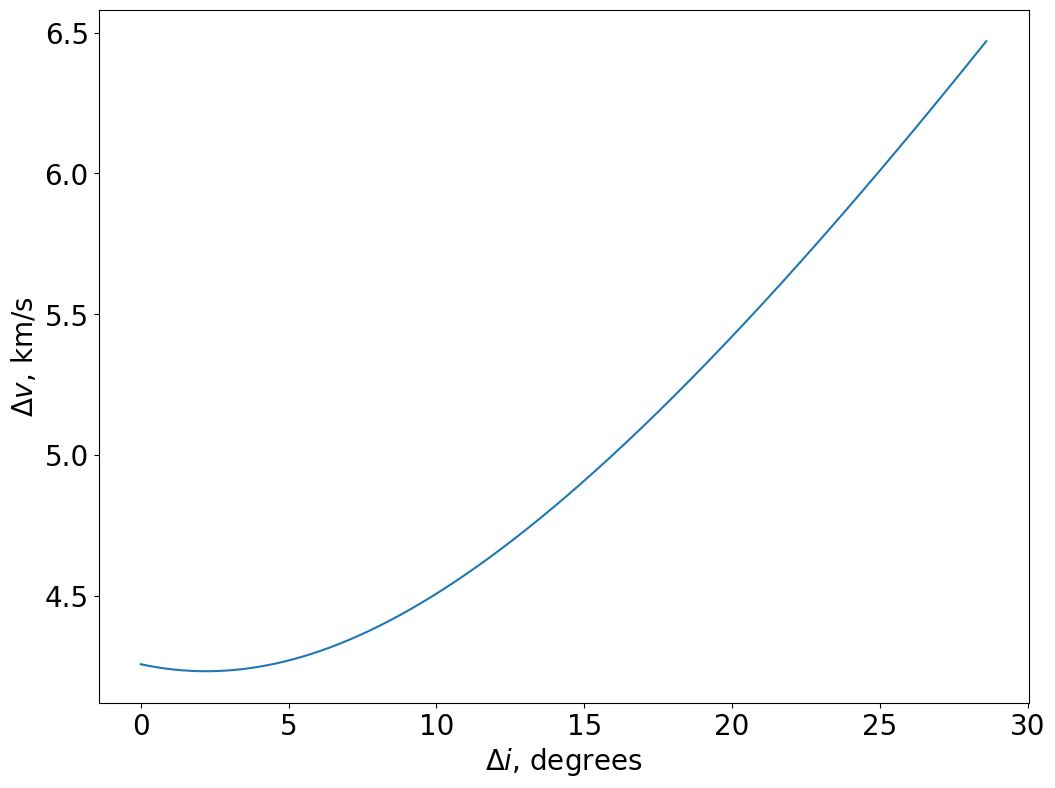

In [9]:
import matplotlib.pyplot as plt
plt.rc("font", size=20)
total_inclination_change = np.radians(28.6)
delta_i = np.linspace(0, total_inclination_change, 1000)
delta_v_total = np.sqrt(v_1**2 + v_t1**2 - 2 * v_1 * v_t1 * np.cos(delta_i)) + np.sqrt(v_2**2 + v_t2**2 - 2 * v_2 * v_t2 * np.cos(delta_i[-1] - delta_i))
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(np.degrees(delta_i), delta_v_total)
ax.set_xlabel(r"$\Delta i$, degrees")
ax.set_ylabel(r"$\Delta v$, km/s");
glue("plane-change-optimize-delta-v", fig)

:::{glue:figure} plane-change-optimize-delta-v
:name: fig:plane-change-optimize-delta-v

The total $\Delta v$ requirement for a Hohmann transfer from LEO to GEO, including a plane change. $\Delta i$ is the fraction of the plane change occuring at LEO.
:::

In {numref}`fig:plane-change-optimize-delta-v`, $\Delta i$ = 28.6° shows Case 1 (plane change at LEO) and $\Delta i$ = 0° shows Case 2 (plane change at GEO). We can see that there appears to be a minimum in the $\Delta v$ around $\Delta i$ = 2.5°. This means that about 2.5° of plane change should happen when transferring into the Hohmann trajectory, and the remainder should happen at altitude.

We can determine the value of this optimium by taking the derivative with respect to $\Delta i$ and setting it equal to zero:

:::{math}
:label: eq:plane-change-delta-v-derivative
\frac{d\Delta v}{d\Delta i} = \frac{v_1 v_{t1}\sin\Delta i}{\sqrt{v_1^2 + v_{t1}^2 - 2v_1v_{t1}\cos\Delta i}} - \frac{v_2 v_{t2}\sin\left(28.6° - \Delta i\right)}{\sqrt{v_2^2 + v_{t2}^2 - 2v_2v_{t2}\cos\left(28.6° - \Delta i\right)}} = 0
:::

This equation must be solved numerically, but we can plot it to verify the behavior.

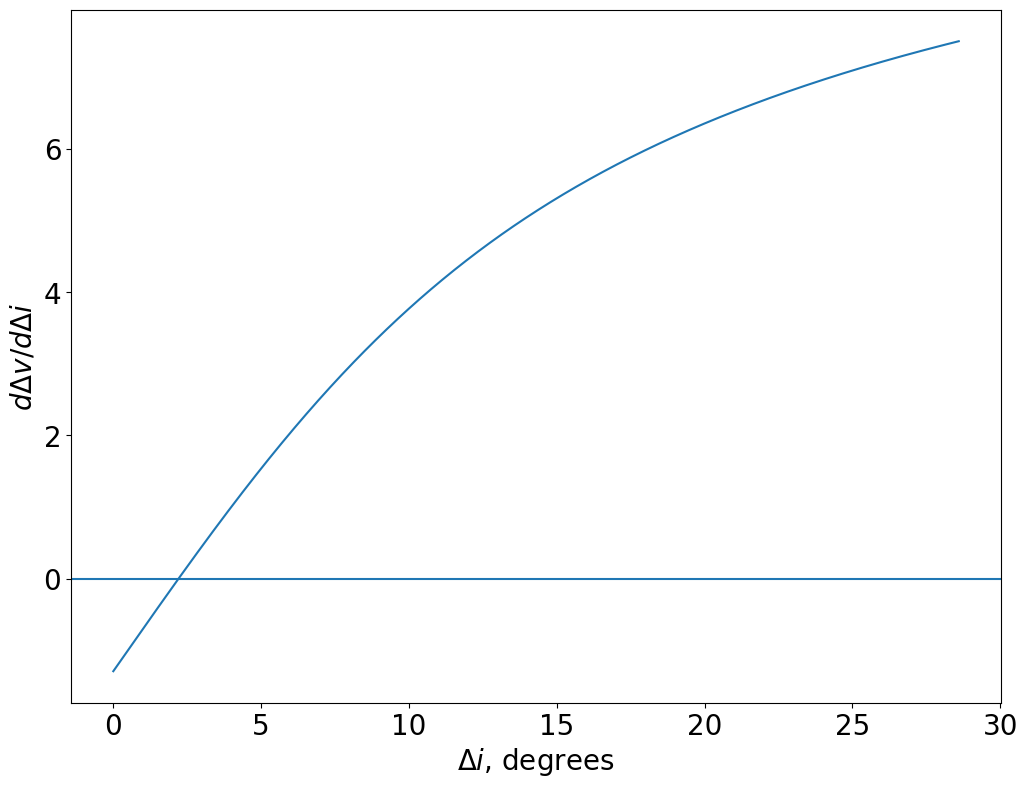

In [10]:
d_v_d_i = v_1*v_t1*np.sin(delta_i) / (np.sqrt(v_1**2 + v_t1**2 - 2*v_1*v_t1*np.cos(delta_i)))
d_v_d_i -= v_2 * v_t2 * np.sin(delta_i[-1] - delta_i) / (np.sqrt(v_2**2 + v_t2**2 - 2*v_2*v_t2*np.cos(delta_i[-1] - delta_i)))
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(np.degrees(delta_i), d_v_d_i)
ax.axhline(0)
ax.set_xlabel(r"$\Delta i$, degrees")
ax.set_ylabel(r"$d\Delta v/d \Delta i$")
glue("plane-change-delta-v-derivative", fig)

:::{glue:figure} plane-change-delta-v-derivative
:name: fig:plane-change-delta-v-derivative

The derivative of the total $\Delta v$ as a function of the fraction of the plane change occuring at LEO.
:::

As expected, there is a single zero crossing of this function, meaning there is one value of the optimum. We can use the Newton solver to find the optimum value.

In [11]:
from scipy.optimize import newton
def func(delta_i, v_1, v_t1, v_2, v_t2):
    d_v_d_i = v_1*v_t1*np.sin(delta_i) / (np.sqrt(v_1**2 + v_t1**2 - 2*v_1*v_t1*np.cos(delta_i)))
    d_v_d_i -= v_2 * v_t2 * np.sin(total_inclination_change - delta_i) / (np.sqrt(v_2**2 + v_t2**2 - 2*v_2*v_t2*np.cos(total_inclination_change - delta_i)))
    return d_v_d_i

delta_i_opt = newton(func, x0=np.radians(2.5), args=(v_1, v_t1, v_2, v_t2))
delta_v_opt = np.sqrt(v_1**2 + v_t1**2 - 2 * v_1 * v_t1 * np.cos(delta_i_opt)) + np.sqrt(v_2**2 + v_t2**2 - 2 * v_2 * v_t2 * np.cos(total_inclination_change - delta_i_opt))

In [12]:
glue("plane-change-delta_i_opt", np.degrees(delta_i_opt))
glue("plane-change-delta_v_opt", delta_v_opt)

The result with the entire plane change at altitude was {glue:text}`plane-change-Delta_v_2:.3f` km/s, whereas the optimized value is {glue:text}`plane-change-delta_v_opt:.3f` km/s, so the optimized value offers less than 1% improvement in $\Delta v$ required. Depending on the mission design, it may or may not be worth the additional control overhead to save this propellant.